## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!unzip bank+marketing.zip
!unzip bank.zip

--2024-10-22 01:24:19--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.1’

bank+marketing.zip.     [    <=>             ] 999,85K  1,30MB/s    in 0,8s    

2024-10-22 01:24:20 (1,30 MB/s) - ‘bank+marketing.zip.1’ saved [1023843]

Archive:  bank+marketing.zip
replace bank.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
Archive:  bank.zip
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`


In [1]:
import pandas as pd

column_list = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

df = pd.read_csv("bank-full.csv", delimiter=";")
df = df[column_list]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`




In [2]:
from sklearn.model_selection import train_test_split

X_train_val = df.copy()
y_train_val = X_train_val.pop('y')

X_train_val, X_test, y_train_val, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

# Further split the train+validation set into train and validation sets (75% / 25%, which is 60% / 20% of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Train set shape: (27126, 14)
Validation set shape: (9042, 14)
Test set shape: (9043, 14)


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `y` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [3]:
from sklearn.metrics import roc_auc_score

numerical_columns = ["balance", "day", "duration", "previous"]
auc_scores = []

for col in numerical_columns:
    score = roc_auc_score(y_train, X_train[col])
    if score < 0.5:
        score = roc_auc_score(y_train, -X_train[col])
    auc_scores.append((col, score))

for col, score in auc_scores:
    print("AUC score", f"{col}: {score}")



AUC score balance: 0.5888313805382317
AUC score day: 0.525957882383908
AUC score duration: 0.8147002759670778
AUC score previous: 0.5985653242764153


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

dv = DictVectorizer()

X_train_encoded = dv.fit_transform(X_train.to_dict(orient="records"))
X_val_encoded = dv.transform(X_val.to_dict(orient="records"))

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

y_val_pred = model.predict(X_val_encoded)
y_val_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

auc_score = roc_auc_score(y_val, y_val_pred_proba)

print(f"AUC score: {auc_score:.3f}")


AUC score: 0.900


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

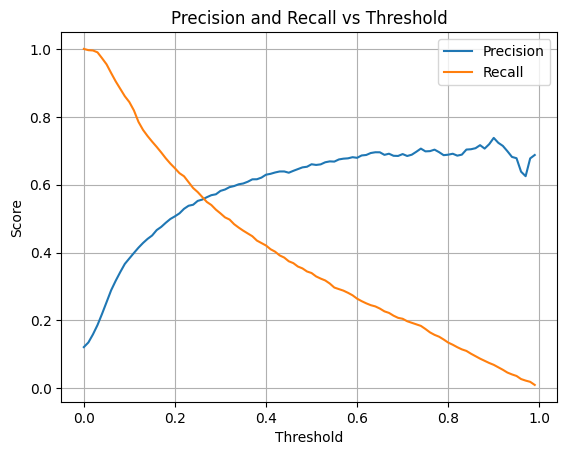

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.0, 1, 0.01)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred = (y_val_pred_proba >= threshold).astype(int)
    y_pred = np.where(y_pred == 0, 'no', 'yes')

    precision = precision_score(y_val, y_pred, pos_label='yes')
    recall = recall_score(y_val, y_pred, pos_label='yes')
    precisions.append(precision)
    recalls.append(recall)

plt.figure()
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()



### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62


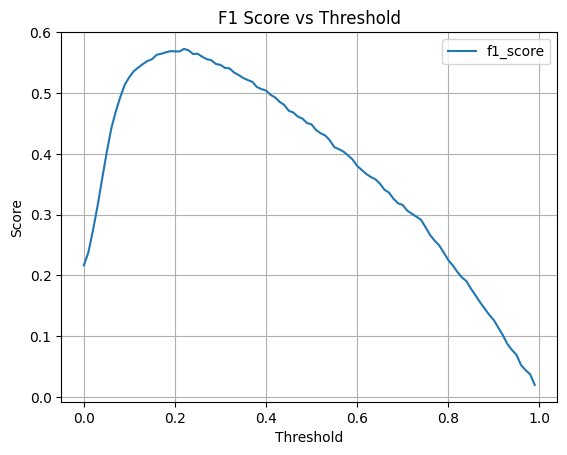

In [30]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.0, 1, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred = (y_val_pred_proba >= threshold).astype(int)
    y_pred = np.where(y_pred == 0, 'no', 'yes')

    f1_score_val = f1_score(y_val, y_pred, pos_label='yes')
    f1_scores.append(f1_score_val)

plt.figure()
plt.plot(thresholds, f1_scores, label='f1_score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26



In [36]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=1)
auc_scores = []
dv = DictVectorizer()

for train_index, val_index in kf.split(X_train_val):

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    X_train_encoded = dv.fit_transform(X_train.to_dict(orient="records"))
    X_val_encoded = dv.transform(X_val.to_dict(orient="records"))

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)

    y_val_pred = model.predict_proba(X_val_encoded)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred)
    auc_scores.append(auc)

std_dev_auc = np.std(auc_scores)
print(f'Standard Deviation of AUC: {std_dev_auc}')



Standard Deviation of AUC: 0.005652844370349586


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.


In [38]:
C_values = [0.000001, 0.001, 1]
results = {}

for C in C_values:
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    auc_scores = []
    dv = DictVectorizer()

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        X_train_encoded = dv.fit_transform(X_train.to_dict(orient="records"))
        X_val_encoded = dv.transform(X_val.to_dict(orient="records"))

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        y_val_pred = model.predict_proba(X_val_encoded)[:, 1]
        auc = roc_auc_score(y_val, y_val_pred)
        auc_scores.append(auc)

    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    results[C] = (mean_auc, std_auc)


for C, (mean_auc, std_auc) in results.items():
    print(f"C: {C}, Mean AUC: {mean_auc:.3f}, Std: {std_auc:.3f}")


C: 1e-06, Mean AUC: 0.701, Std: 0.009
C: 0.001, Mean AUC: 0.861, Std: 0.007
C: 1, Mean AUC: 0.906, Std: 0.006


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw04
* If your answer doesn't match options exactly, select the closest one
